In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob
import pickle

# 로그 데이터

In [ ]:
logdata = pd.read_csv("/content/drive/MyDrive/빅콘테스트 2022/data/log_data.csv")

In [ ]:
logdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


In [ ]:
logdata.isnull().sum()
# os랑 app version은 그닥 상관없을 것 같긴 함

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

In [ ]:
logdata

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [ ]:
logdata.loc[logdata['user_id']==242442].head(50)

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
705624,242442,OpenApp,2022-03-04 10:13:06,Android,3.8.0,2022-03-04
705625,242442,Login,2022-03-04 10:13:12,Android,3.8.0,2022-03-04
705626,242442,UseLoanManage,2022-03-04 10:13:18,Android,3.8.0,2022-03-04
705627,242442,UseLoanManage,2022-03-04 10:13:34,Android,3.8.0,2022-03-04
705631,242442,StartLoanApply,2022-03-04 10:18:10,Android,3.8.0,2022-03-04
705632,242442,ViewLoanApplyIntro,2022-03-04 10:18:10,Android,3.8.0,2022-03-04
705633,242442,CompleteIDCertification,2022-03-04 10:18:36,Android,3.8.0,2022-03-04
705639,242442,EndLoanApply,2022-03-04 10:21:44,Android,3.8.0,2022-03-04
705858,242442,OpenApp,2022-03-04 15:22:20,Android,3.8.0,2022-03-04
705859,242442,Login,2022-03-04 15:22:35,Android,3.8.0,2022-03-04


In [ ]:
logdata['event'].unique()

array(['StartLoanApply', 'ViewLoanApplyIntro', 'EndLoanApply', 'OpenApp',
       'UseLoanManage', 'UsePrepayCalc', 'Login',
       'CompleteIDCertification', 'UseDSRCalc', 'SignUp', 'GetCreditInfo'],
      dtype=object)

# 대출 상품 데이터

In [ ]:
loan_result = pd.read_csv("/content/drive/MyDrive/빅콘테스트 2022/data/loan_result.csv")

In [ ]:
loan_result.loc[loan_result['is_applied']==1]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
13304,2136706,2022-05-09 10:41:06,23,236,37000000.0,9.9,1.0
13309,2136706,2022-05-09 10:41:18,62,200,14000000.0,9.3,1.0
13314,2136706,2022-05-09 10:41:06,1,61,13000000.0,8.9,1.0
13383,679142,2022-05-09 13:39:36,47,47,12000000.0,6.7,1.0
...,...,...,...,...,...,...,...
13519533,763676,2022-05-16 13:39:39,60,183,60000000.0,5.2,1.0
13519555,327877,2022-05-16 14:08:39,2,7,30000000.0,11.8,1.0
13519617,190135,2022-05-16 07:52:13,59,150,9000000.0,17.7,1.0
13519620,1369315,2022-05-16 06:40:45,49,136,18000000.0,6.5,1.0


In [ ]:
loan_result['is_applied'].value_counts() # 상당한 불균형 데이터

0.0    9709675
1.0     560449
Name: is_applied, dtype: int64

In [ ]:
loan_result.isnull().sum() #is_applied 데이터가 결측치 다수 존재 이는 무엇을 의미하는가? -> 대출 신청을 하지 않았다는 말인가?

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [43]:
loan_result.loc[loan_result['application_id']==1369315]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13519620,1369315,2022-05-16 06:40:45,49,136,18000000.0,6.5,1.0
13519621,1369315,2022-05-16 06:40:24,59,251,18000000.0,6.7,1.0
13519622,1369315,2022-05-16 06:40:25,7,220,9000000.0,12.4,0.0
13519623,1369315,2022-05-16 06:40:25,7,191,57000000.0,12.4,0.0
13519624,1369315,2022-05-16 06:40:24,59,150,25000000.0,16.4,0.0
13519625,1369315,2022-05-16 06:40:34,38,16,18000000.0,18.4,0.0
13519626,1369315,2022-05-16 06:40:25,22,221,10000000.0,18.4,0.0
13519627,1369315,2022-05-16 06:40:25,49,195,18000000.0,9.0,0.0
13519628,1369315,2022-05-16 06:40:24,38,223,18000000.0,18.4,0.0
13519629,1369315,2022-05-16 06:40:24,27,148,18000000.0,7.0,0.0


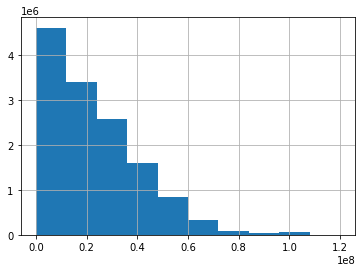

In [49]:
loan_result['loan_limit'].hist(range=[0,1.2e8]) #승인한도 히스토그램

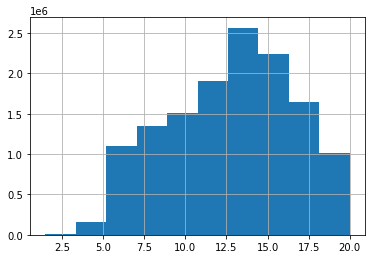

In [50]:
loan_result['loan_rate'].hist() #승인금리 히스토그램

In [ ]:
loan_result.groupby("is_applied")['loan_rate'].agg(['mean','median','min','max','sum','count']) # 예상외로 큰 차이는 없다

,mean,median,min,max,sum,count
is_applied,,,,,,
0.0,12.814556,13.3,1.5,20.0,124425172.1,9709675
1.0,11.913990,11.9,1.5,20.0,6608821.3,554711


is_applied
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: loan_rate, dtype: object

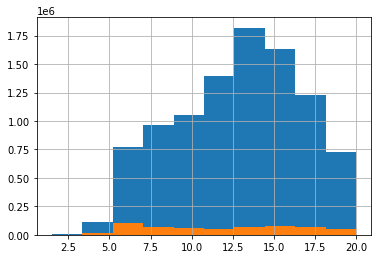

In [ ]:
loan_result.groupby("is_applied")['loan_rate'].hist()

In [ ]:
loan_result.groupby("is_applied")['loan_limit'].agg(['mean','median','min','max','sum','count'])

,mean,median,min,max,sum,count
is_applied,,,,,,
0.0,2.276495e+07,18000000.0,0.0,1.000000e+10,2.210403e+14,9709675
1.0,1.986588e+07,15000000.0,0.0,1.000000e+10,1.101982e+13,554711


is_applied
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: loan_limit, dtype: object

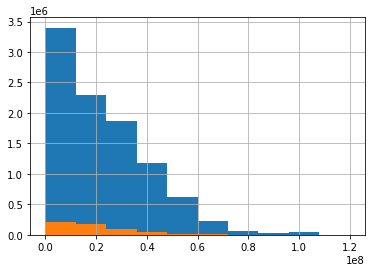

In [ ]:
loan_result.groupby("is_applied")['loan_limit'].hist(range=[0,1.2e8])

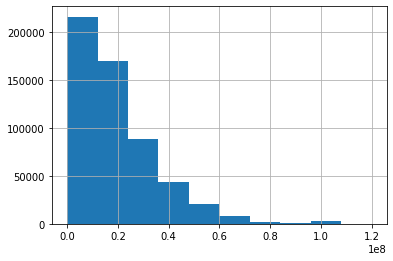

In [ ]:
loan_result.loc[loan_result['is_applied']==1]['loan_limit'].hist(range=[0,1.2e8]) # 대출신청된 상품들의 대출한도 히스토그램

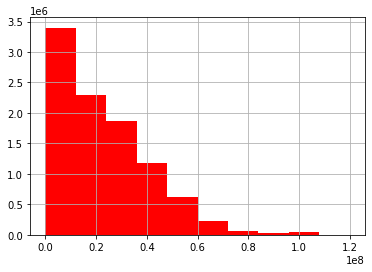

In [46]:
loan_result.loc[loan_result['is_applied']==0]['loan_limit'].hist(range=[0,1.2e8],color='red') # 대출신청된 상품들의 대출한도 히스토그램

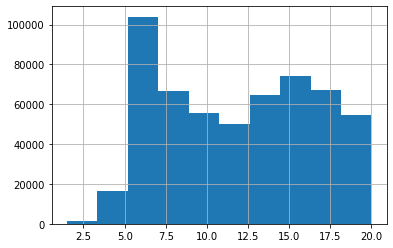

In [45]:
loan_result.loc[loan_result['is_applied']==1]['loan_rate'].hist() # 대출신청된 상품들의 승인금리 히스토그램
# 금리는 비교적 낮을 수록 많이 대출하는 것으로 보임

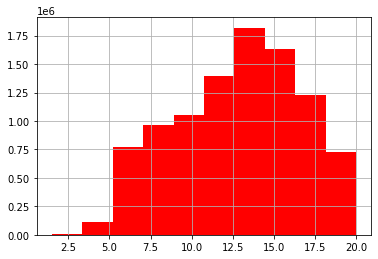

In [47]:
loan_result.loc[loan_result['is_applied']==0]['loan_rate'].hist(color='red') # 대출신청된 상품들의 승인한도 히스토그램